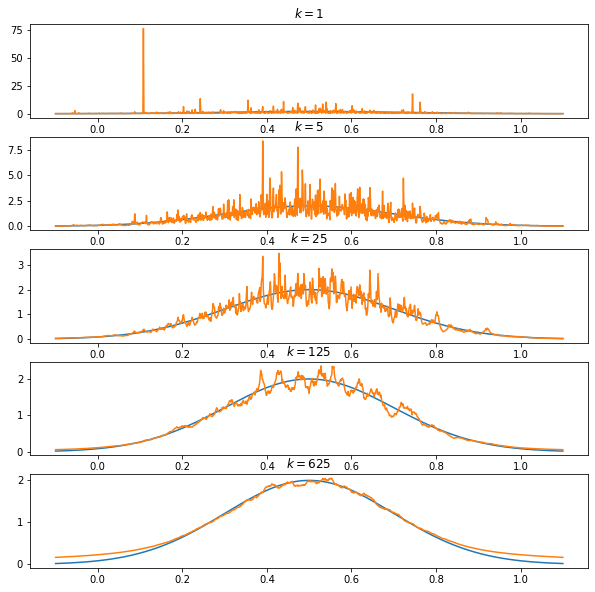

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

gaussian = norm(loc=0.5, scale=0.2)
X = gaussian.rvs(5000)
grid = np.linspace(-0.1, 1.1, 1000)

Ks = [1,5,25,125,625]
fig, axes = plt.subplots(5,1, figsize=(10,10))

for i, ax in enumerate(axes.flat):
    
    # choose K value
    K = Ks[i]
    
    # run knn density estimation with chosen K
    p = np.zeros_like(grid)
    n = X.shape[0]
    for i, x in enumerate(grid):
        dists = np.abs(X-x)
        neighbours = dists.argsort()
        neighbour_K = neighbours[K]
        p[i] = (K/n) * 1/(2 * dists[neighbour_K])
        
    # True dist
    ax.plot(grid, gaussian.pdf(grid))
    
    # plot density estimate
    ax.plot(grid, p)
    
    ax.set_title(f'$k={K}$')
plt.savefig("knn-density_est.png", dpi=300)
plt.show()